In [1]:
train_path = '/content/drive/MyDrive/DATASETS/BreastCancer1/train'
test_path = '/content/drive/MyDrive/DATASETS/BreastCancer1/test'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras import models,layers
import os
import glob
import cv2
from keras.applications.vgg16 import VGG16

In [4]:
print(os.listdir("/content/drive/MyDrive/DATASETS/BreastCancer1"))
print(glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/train/*'))
print(glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/test/*'))
classes = ["NoCancer","Cancer"]

['test', 'train']
['/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer', '/content/drive/MyDrive/DATASETS/BreastCancer1/train/1_Cancer']
['/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer', '/content/drive/MyDrive/DATASETS/BreastCancer1/test/1_Cancer']


In [5]:
train_images=[]
train_labels=[]
for directory_path in glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/train/*'):
  label=directory_path.split("//")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path,"*.png")):
    print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    train_images.append(img)
    train_labels.append(label)

/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x651_y1451_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1201_y1701_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x1651_y1851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1951_y851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x2551_y1551_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x851_y1001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x951_y2001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1001_y2001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x1251_y1751_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x801

In [6]:
test_images=[]
test_labels=[]
for directory_path in glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/test/*'):
  label=directory_path.split("//")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path,"*.png")):
    print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    test_images.append(img)
    test_labels.append(label)

/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x351_y651_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x951_y2351_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x751_y2101_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x201_y1201_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x851_y1201_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1801_y2101_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1551_y651_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1401_y851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x901_y951_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x851_y951_class0.png


In [7]:
train_images=np.asarray(train_images)
train_labels=np.asarray(train_labels)
test_images=np.asarray(test_images)
test_labels=np.asarray(test_labels)
train_images.shape

(200, 224, 224, 3)

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)

In [9]:
test_labels_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
x_train,y_train,x_test,y_test=train_images,train_labels_encoded,test_images,test_labels_encoded

In [11]:
x_test.shape

(20, 224, 224, 3)

'/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer'

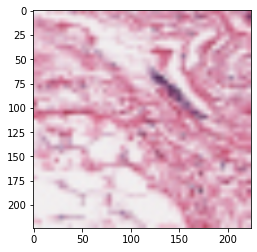

In [12]:
plt.imshow(x_test[2])
test_labels[2]

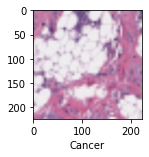

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train, y_train, 100)

In [14]:
#x_train_flatten=x_train.reshape(len(x_train),224*224,3)
#print("After Flattening the shape of x_train is : ",x_train_flatten.shape)
#x_test_flatten=x_test.reshape(len(x_test),224*224,3)
#print("After Flattening the shape of x_test is : ",x_test_flatten.shape)

In [15]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [16]:
X_train[0]

array([[[0.57254902, 0.34509804, 0.5254902 ],
        [0.57254902, 0.34509804, 0.5254902 ],
        [0.56862745, 0.34117647, 0.52156863],
        ...,
        [0.59607843, 0.34117647, 0.54509804],
        [0.59215686, 0.34117647, 0.54509804],
        [0.59215686, 0.34117647, 0.54509804]],

       [[0.57254902, 0.34509804, 0.5254902 ],
        [0.57254902, 0.34509804, 0.5254902 ],
        [0.57254902, 0.34117647, 0.52156863],
        ...,
        [0.59607843, 0.34117647, 0.54509804],
        [0.59215686, 0.34117647, 0.54509804],
        [0.59215686, 0.34117647, 0.54509804]],

       [[0.57254902, 0.34117647, 0.5254902 ],
        [0.57254902, 0.34117647, 0.5254902 ],
        [0.56862745, 0.34117647, 0.52156863],
        ...,
        [0.6       , 0.34117647, 0.54117647],
        [0.59215686, 0.3372549 , 0.54117647],
        [0.59215686, 0.3372549 , 0.54117647]],

       ...,

       [[0.75686275, 0.39607843, 0.56862745],
        [0.75686275, 0.39607843, 0.56862745],
        [0.75686275, 0

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [18]:
X_train[0].shape

(224, 224, 3)

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
7/7 [==============================] - 10s 110ms/step - loss: 2.9517 - accuracy: 0.5500
Epoch 2/20
7/7 [==============================] - 1s 82ms/step - loss: 0.7170 - accuracy: 0.4600
Epoch 3/20
7/7 [==============================] - 1s 82ms/step - loss: 0.6716 - accuracy: 0.5950
Epoch 4/20
7/7 [==============================] - 1s 82ms/step - loss: 0.5867 - accuracy: 0.6900
Epoch 5/20
7/7 [==============================] - 1s 79ms/step - loss: 0.5307 - accuracy: 0.7250
Epoch 6/20
7/7 [==============================] - 1s 82ms/step - loss: 0.5206 - accuracy: 0.7250
Epoch 7/20
7/7 [==============================] - 1s 81ms/step - loss: 0.4565 - accuracy: 0.8000
Epoch 8/20
7/7 [==============================] - 1s 80ms/step - loss: 0.4328 - accuracy: 0.8250
Epoch 9/20
7/7 [==============================] - 1s 81ms/step - loss: 0.5206 - accuracy: 0.7800
Epoch 10/20
7/7 [==============================] - 1s 81ms/step - loss: 0.4608 - accuracy: 0.8050
Epoch 11/20
7/7 [==========

In [20]:
cnn.evaluate(X_test,y_test)

1/1 [==============================] - 1s 536ms/step - loss: 0.4590 - accuracy: 0.8500


[0.45897263288497925, 0.8500000238418579]

In [21]:
y_pred = cnn.predict(X_test)
y_pred

array([[0.97005624, 0.18204866],
       [0.92455596, 0.23458175],
       [0.9311486 , 0.19824444],
       [0.99381953, 0.04758037],
       [0.92623127, 0.22183469],
       [0.76458275, 0.49429306],
       [0.9097988 , 0.24647057],
       [0.5984263 , 0.61074275],
       [0.9832797 , 0.10404486],
       [0.96280336, 0.11700541],
       [0.48871264, 0.6397261 ],
       [0.4661748 , 0.6909694 ],
       [0.44037527, 0.7195516 ],
       [0.79564524, 0.40213072],
       [0.44760674, 0.6666741 ],
       [0.5793909 , 0.64275557],
       [0.86515117, 0.29837936],
       [0.56314516, 0.5873532 ],
       [0.5116391 , 0.60582054],
       [0.44200775, 0.70078033]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]

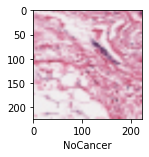

In [23]:
plot_sample(X_test, y_test,2)

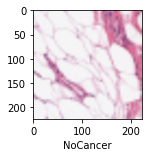

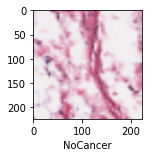

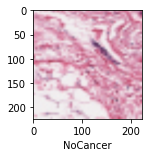

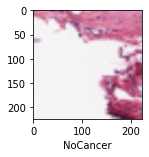

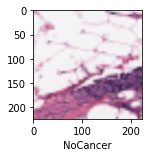

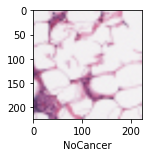

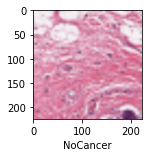

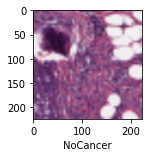

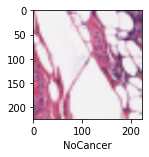

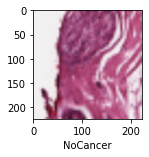

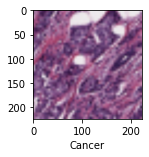

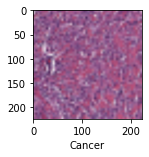

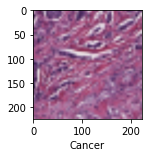

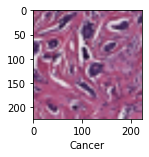

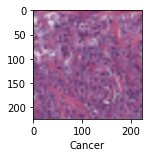

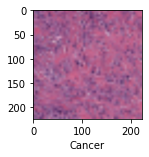

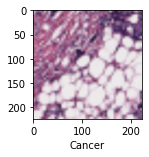

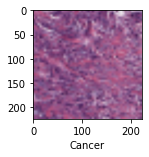

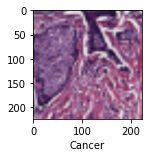

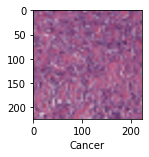

In [24]:
for i in range(len(y_pred)):
  plot_sample(x_test,y_test,i)

***Implementation of VGG16***

In [25]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [26]:
vgg16=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg19=VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

80150528/80134624 [==============================] - 1s 0us/step


In [27]:
for layer in vgg16.layers:
  layer.trainable=False
for layer in vgg19.layers:
  layer.trainable=False

In [28]:
folders=glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/train/*')
x=Flatten()(vgg16.output)
x1=Flatten()(vgg19.output)
prediction=Dense(len(folders),activation='softmax')(x)
prediction1=Dense(len(folders),activation='softmax')(x1)

In [29]:
model=Model(inputs=vgg16.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [30]:
model1=Model(inputs=vgg19.input,outputs=prediction1)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [32]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [33]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [34]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS/BreastCancer1/train',target_size=(224,224),batch_size=32,class_mode='categorical')
testing_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DATASETS/BreastCancer1/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [35]:
r=model.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
7/7 [==============================] - 13s 1s/step - loss: 0.9819 - accuracy: 0.5500 - val_loss: 0.4549 - val_accuracy: 0.7500
Epoch 2/20
7/7 [==============================] - 4s 585ms/step - loss: 0.5252 - accuracy: 0.7750 - val_loss: 0.4291 - val_accuracy: 0.8000
Epoch 3/20
7/7 [==============================] - 4s 583ms/step - loss: 0.4156 - accuracy: 0.8300 - val_loss: 0.4590 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 4s 592ms/step - loss: 0.3800 - accuracy: 0.8350 - val_loss: 0.3216 - val_accuracy: 0.9000
Epoch 5/20
7/7 [==============================] - 4s 581ms/step - loss: 0.3326 - accuracy: 0.8600 - val_loss: 0.3007 - val_accuracy: 0.8500
Epoch 6/20
7/7 [==============================] - 4s 573ms/step - loss: 0.3042 - accuracy: 0.8850 - val_loss: 0.3364 - val_accuracy: 0.8500
Epoch 7/20
7/7 [==============================] - 4s 580ms/step - loss: 0.2553 - accuracy: 0.9100 - val_loss: 0.3606 - val_accuracy: 0.9000
Epoch 8/20
7/7 [======

In [36]:
r1=model1.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
7/7 [==============================] - 6s 704ms/step - loss: 0.7867 - accuracy: 0.6500 - val_loss: 0.3505 - val_accuracy: 0.9000
Epoch 2/20
7/7 [==============================] - 5s 622ms/step - loss: 0.4711 - accuracy: 0.7800 - val_loss: 0.3269 - val_accuracy: 0.8500
Epoch 3/20
7/7 [==============================] - 4s 614ms/step - loss: 0.4115 - accuracy: 0.8150 - val_loss: 0.3963 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 4s 589ms/step - loss: 0.5507 - accuracy: 0.7200 - val_loss: 0.3308 - val_accuracy: 0.8500
Epoch 5/20
7/7 [==============================] - 4s 682ms/step - loss: 0.4493 - accuracy: 0.7800 - val_loss: 0.3905 - val_accuracy: 0.8000
Epoch 6/20
7/7 [==============================] - 5s 619ms/step - loss: 0.3190 - accuracy: 0.8700 - val_loss: 0.5844 - val_accuracy: 0.7000
Epoch 7/20
7/7 [==============================] - 4s 609ms/step - loss: 0.3683 - accuracy: 0.8300 - val_loss: 0.4374 - val_accuracy: 0.7500
Epoch 8/20
7/7 [====

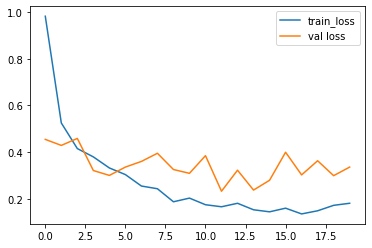

<Figure size 432x288 with 0 Axes>

In [37]:
#VGG16
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

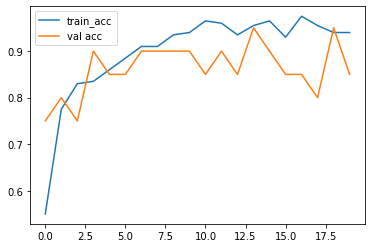

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

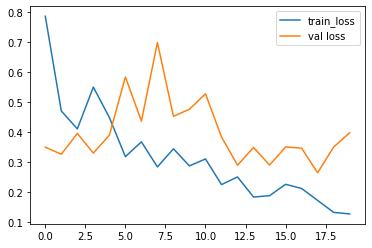

<Figure size 432x288 with 0 Axes>

In [39]:
#VGG19
plt.plot(r1.history['loss'],label='train_loss')
plt.plot(r1.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

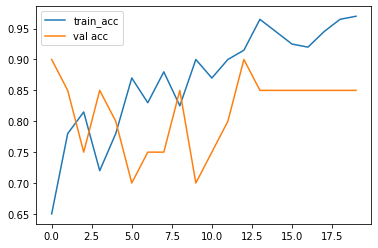

<Figure size 432x288 with 0 Axes>

In [40]:
plt.plot(r1.history['accuracy'],label='train_acc')
plt.plot(r1.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

***SVC RBF***

In [41]:
train_images1=[]
train_labels1=[]
for directory_path in glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/train/*'):
  label=directory_path.split("//")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path,"*.png")):
    print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    train_images1.append(img)
    train_labels1.append(label)

/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x651_y1451_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1201_y1701_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x1651_y1851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1951_y851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x2551_y1551_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x851_y1001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x951_y2001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1001_y2001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x1251_y1751_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x801

In [42]:
val_images=[]
val_labels=[]
for directory_path in glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/test/*'):
  label=directory_path.split("//")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path,"*.png")):
    print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    val_images.append(img)
    val_labels.append(label)

/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x351_y651_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x951_y2351_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x751_y2101_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x201_y1201_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x851_y1201_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1801_y2101_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1551_y651_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1401_y851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x901_y951_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x851_y951_class0.png


In [43]:
val_images=np.asarray(val_images)
val_labels=np.asarray(val_labels)
train_images1=np.asarray(train_images1)
train_labels1=np.asarray(train_labels1)

In [44]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(val_labels)
val_labels_encoded=le.transform(val_labels)
le.fit(train_labels1)
train_labels_encoded=le.transform(train_labels1)
print(train_labels_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [45]:
x_train,y_train,x_val,y_val=train_images,train_labels_encoded,val_images,val_labels_encoded

In [46]:
x_train,x_val=x_train/255.0,x_val/255.0

In [47]:
#Feature Extraction
feature_extractor=vgg16.predict(x_train)
features=feature_extractor.reshape(feature_extractor.shape[0],-1)
x_training=features

In [48]:
from sklearn import svm
model=svm.SVC(kernel='rbf',gamma=0.01)
model.fit(x_training,train_labels_encoded)

SVC(gamma=0.01)

In [49]:
x_val_feature=vgg16.predict(x_val)
x_val_features=x_val_feature.reshape(x_val_feature.shape[0],-1)
prediction=model.predict(x_val_features)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [50]:
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(prediction,val_labels_encoded))

Accuracy =  0.75


In [51]:
import pandas as pd 

lst=['Models','CNN','VGG16','VGG19','RBF']
lst1=['Accuracy Highest','90','95','90','90']

dframe = pd.DataFrame(lst1,lst)  
dframe.head()  

,0
Models,Accuracy Highest
CNN,90
VGG16,95
VGG19,90
RBF,90


In [52]:
#EfficientNet Implementation

In [53]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

#Using model without transfer learning

outputs = EfficientNetB0(include_top = True, weights = None, classes=NUM_CLASSES)(inputs)

In [60]:
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 2)                4052133   
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [58]:
x_train.shape

(200, 224, 224, 3)

In [61]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
7/7 [==============================] - 18s 676ms/step - loss: 5.1049 - accuracy: 0.5150
Epoch 2/20
7/7 [==============================] - 4s 492ms/step - loss: 2.4601 - accuracy: 0.5150
Epoch 3/20
7/7 [==============================] - 3s 492ms/step - loss: 2.8182 - accuracy: 0.6500
Epoch 4/20
7/7 [==============================] - 3s 489ms/step - loss: 4.2137 - accuracy: 0.6150
Epoch 5/20
7/7 [==============================] - 3s 492ms/step - loss: 2.3266 - accuracy: 0.7150
Epoch 6/20
7/7 [==============================] - 4s 495ms/step - loss: 1.3143 - accuracy: 0.6550
Epoch 7/20
7/7 [==============================] - 3s 490ms/step - loss: 0.9628 - accuracy: 0.7850
Epoch 8/20
7/7 [==============================] - 3s 487ms/step - loss: 1.3245 - accuracy: 0.7750
Epoch 9/20
7/7 [==============================] - 3s 492ms/step - loss: 1.9276 - accuracy: 0.7200
Epoch 10/20
7/7 [==============================] - 3s 489ms/step - loss: 1.5731 - accuracy: 0.7900
Epoch 11/20
7/7 [=

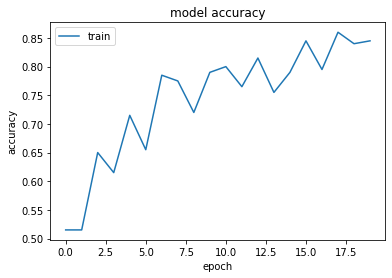

In [64]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","validation"], loc="upper left")
plt.show()

In [69]:
pred = model.evaluate(x_test, y_test)
pred

1/1 [==============================] - 0s 142ms/step - loss: 1.1476 - accuracy: 0.5000


[1.1476331949234009, 0.5]

In [70]:
print("loss "+str(pred[0]))
print("Accuracy on Test Dataset : "+ str(pred[1])) 

loss 1.1476331949234009
Accuracy on Test Dataset : 0.5


In [71]:
#Instead of learning, the alogrithm seems to be memorizing instead of learning and thus the model is overfit to some extent

In [72]:
y_pred = model.predict(X_test)

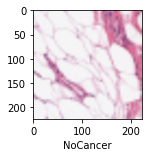

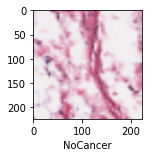

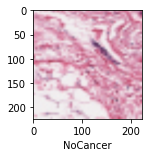

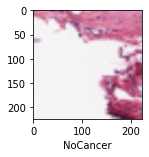

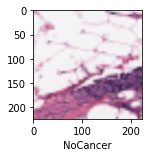

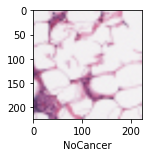

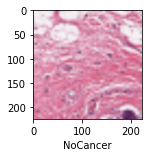

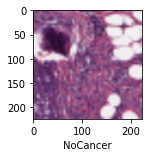

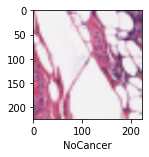

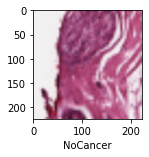

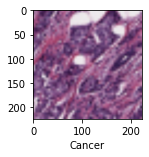

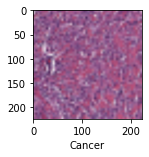

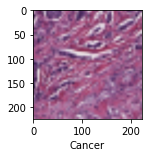

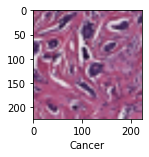

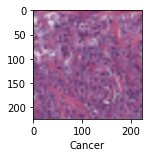

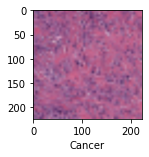

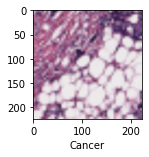

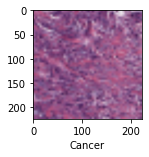

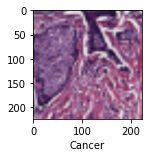

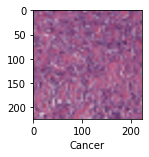

In [73]:
for i in range(len(y_pred)):
  plot_sample(x_test,y_test,i)

In [76]:
import pandas as pd 

lst=['Models','CNN','VGG16','VGG19','RBF','EN']
lst1=['Highest Train Accuracy','90','95','90','90','85']

dframe = pd.DataFrame(lst1,lst)  
dframe 

,0
Models,Highest Train Accuracy
CNN,90
VGG16,95
VGG19,90
RBF,90
EN,85
